<a href="https://colab.research.google.com/github/onleey/Machine-Learning_demo/blob/master/608_%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/001'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/001


### 지도학습(supervised learning)
- 지도학습은 레이블(label), 즉 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식이다.
- 지도학습의 대표적인 유형인 분류(Classification)는 학습 데이터로 주어진 데이터의 피처와 레이블값(결정값, 클래스 값)을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것이다.
- 즉, 기존 데이터가 어떤 레이블에 속하는지 패턴을 알고리즘으로 인지한 뒤에 새롭게 관측된 데이터에 대한 레이블을 판별하는 것이다.
- 분류를 위한 머신러닝 알고리즘
 - 베이즈(Bayes)통계와 생성 모델에 기반한 나이브베이즈(Naive Bayes)
 -  독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀(Logistic Regression)
 - 데이터 균일도에 따른 규칙 기반의 결정 트리(Decision Tree)
 - 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 서포트 벡터(Support Vector Machine)
 - 근접 거리를 기준으로 하는 최소 근접(Nearest Neighbor)알고리즘
 - 심층 연결 기반의 신경망(Neural Network)
 - 서로 다른(또는 같은) 머신러닝 알고리즘을 결합한 앙상블(Ensemble)

### 타이타닉 탑승자 데이터
PassengerId: 탑승자 데이터 일련번호     
Survived: 생존여부, 0 = 사망, 1 = 생존   
Pclass: 티켓의 선실 등급, 1 = 일등석, 2 = 이등석, 3 = 삼등석
Sex: 탑승자 성별  
Name: 탑승자 이름  
Age: 탑승자 나이  
SibSp: 같이 탑승한 형제, 자매 또는 배우자 인원 수  
Parch: 같이 탑승한 부모님 또는 자녀 인원 수  
Ticket: 티켓 번호  
Fare: 요금  
Cabin: 선실 번호  
Embarked: 탑승 항구, C = Cherbourg, Q = Queenstown, S = Southampton

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
titanic_df= pd.read_csv('./datasets/titanic/titanic/train.csv')

In [8]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
titanic_df.describe()    #간단한 분류

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


사이킷런 머신러닝 알고리즘에서는 null 값을 허용하지 않으므로 Null 값을 어떻게 처리할지 결정해야 한다.

In [11]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace= True)
titanic_df['Cabin'].fillna('N', inplace= True)
titanic_df['Embarked'].fillna('N', inplace= True)
print(f'데이터 세트 Null 개수:\n{titanic_df.isnull().sum()}')

데이터 세트 Null 개수:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [12]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Cabin 값 추출
-cabin의 선실번호 중 선실 등급을 나타내는 첫 번째 알파벳이 중요해 모이므로 앞 문자만 추출함.

In [13]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head())

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object


성별에 따른 생존률을 알아보기위해 groupby()와 count()를 사용해보자.
- survived컬럼은 레이블로서 결정 클래스 값이다.
-  survived 0은 사망, 1은 생존이다.
- 탑승객은 남자가 577명, 여자가 314명으로 남자가 더 많다.
- 여자는 314명 중 233명으로 약 74.2%가 생존했지만, 남자의 경우는 577명 중 468명이 죽고 109명만 살아남아 약 18.8%가 생존했다.

In [14]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [15]:
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [16]:
titanic_df[['Sex','Survived']].value_counts()

Sex     Survived
male    0           468
female  1           233
male    1           109
female  0            81
dtype: int64

In [17]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [18]:
titanic_df.groupby(['Sex','Survived'])['Sex'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

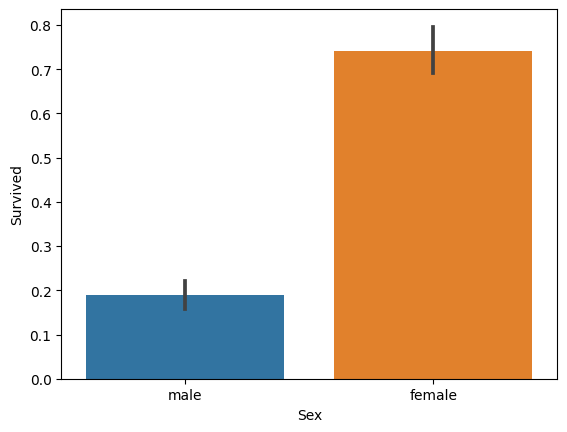

In [19]:
sns.barplot(data=titanic_df, x='Sex', y='Survived')

<Axes: xlabel='Pclass', ylabel='Survived'>

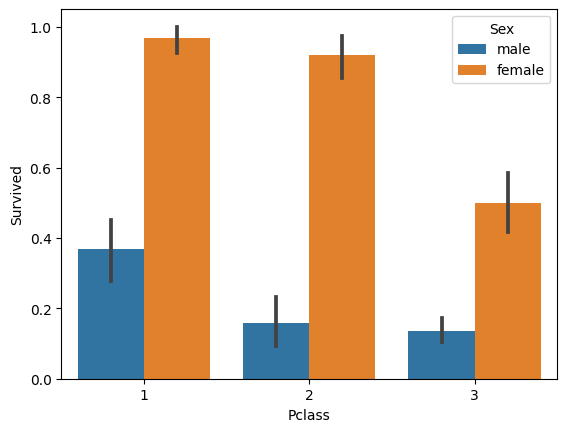

In [20]:
sns.barplot(data= titanic_df, x='Pclass', y='Survived', hue='Sex')

Age별 생존여부
- pclass가 높은 부자들의 생존률이 더 높고, 남성보다 여성의 생존률이 높은 것을 알 수 있었다.
- age의 경우 값이 너무 다양하기때문에 범위별로 분류해서 카테고리 값을 할당함.
 - Baby = 0~5세
 - Child = 6~12세
 - Teenager = 13~18세
 - Student = 19~25세
 - Young Adult = 26~35세
 - Adult = 36~60세
 - Elderly = 61세 이상
 - Unknown = -1 이하의 오류 값

- 여자 Senior의 경우 매우 생존 확률이 높다.
- 이제까지 분석한 결과 Sex, Age, Pclass 등이 중요하게 생존을 좌우하는 피처임을 확인할 수 있다.

In [21]:
def get_category(age):
  cat = ''
  if age <= -1 : cat = 'Unknown'
  elif age <= 5 : cat = 'Baby'
  elif age <= 12 : cat = 'Child'
  elif age <= 18: cat = 'Teenager'
  elif age <= 25 : cat = 'Student'
  elif age <= 35 : cat = 'Young Adult'
  elif age <= 60 : cat = 'Adult'
  else : cat = 'Elderly'
  return cat

plt.figure(figsize = (10,6))

#X축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child','Teenager','Student','Young Adult','Adult','Elderly']

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))

<Figure size 1000x600 with 0 Axes>

In [22]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,Young Adult


<Axes: xlabel='Age_cat', ylabel='Survived'>

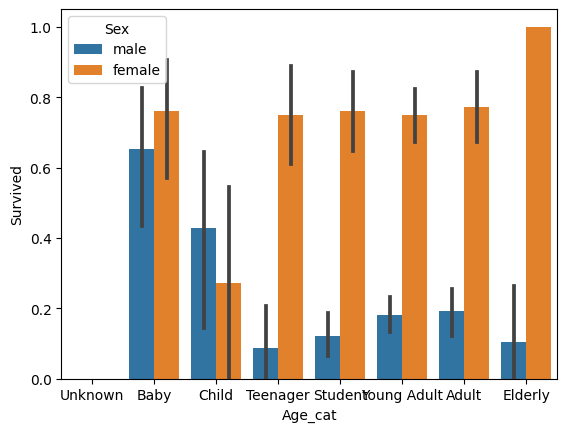

In [23]:
sns.barplot(data = titanic_df, x='Age_cat', y='Survived',hue ='Sex', order= group_names  )

In [24]:
from sklearn import preprocessing


le= preprocessing.LabelEncoder()
a = le.fit_transform(titanic_df['Sex'])
print(le)
print(a[:5])
print(titanic_df['Sex'][:5])



LabelEncoder()
[1 0 0 0 1]
0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object


In [25]:
titanic_df['Sex'][:5]

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

string to number  :  문자열 카테고리 피처를 숫자형 카테고리 피처로 변환

- 사이킷런의 LabelEncoder 클래스를 사용한다.
- LabelEncoder 객체는 카테고리 값의 유형 수에 따라 0 ~ (카테고리 유형 수 - 1)까지의 숫자 값으로 변환한다.

In [26]:
from sklearn.preprocessing import LabelEncoder

le= preprocessing.LabelEncoder()
a = le.fit_transform(titanic_df['Sex'])
print(le)
print(a[:5])
print(titanic_df['Sex'][:5])



LabelEncoder()
[1 0 0 0 1]
0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object


In [27]:
# 'Cabin, Sex, Embarked 3개의 feature를 laberencoder를 이용해서 바꿈
from sklearn.preprocessing import LabelEncoder


def encode_features(dataDF):
    features=['Cabin','Sex', 'Embarked']
    for feature in features:
      le = LabelEncoder()
      le = le.fit(dataDF[feature])
      dataDF[feature] = le.transform(dataDF[feature])

    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3,Young Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3,Young Adult


transform function
- 지금까지 피처를 가공한 내역을 정리하고 이를 함수로 만들어 쉽게 재사용할 수 있도록 만들어보자.
- 전처리를 전체적으로 호출하는 함수는 transform_features()이며 Null처리, 포매팅, 인코딩을 수행하는 내부함수로 구성하려한다.

In [28]:
# Null 처리 함수
def fill_na(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('S', inplace=True)
    df['Fare'].fillna(0, inplace=True)

    return df

# 불필요한 칼럼 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])

    return df

# 내부함수 호출
def transform_features(df):
    df = fill_na(df)
    df = drop_features(df)
    df = format_features(df)

    return df

결정 트리, 랜덤 포레스트, 로지스틱 회귀
- 결정 트리, 랜덤 포레스트, 로지스틱 회귀를 이용해 타이타닉 생존자를 예측하려 한다. 로지스틱 회귀는 이름은 회귀지만 실제로는 분류 알고리즘이다.
- 사이킷런 클래스를 이용해 train_test_split( )으로 분리한 학습 데이터와 테스트 데이터를 기반으로 머신러닝 모델을 학습하고(fit), 예측(predict)한다.
- 예측 성능 평가는 정확도로 할 것이며 이를 위해 accuracy_score( ) API를 사용한다.

사이킷런을 이용한 생존자 예측
- 원본 CSV 파일을 다시 로딩하고 Survived 속성만 별도로 분리해 클래스 결정값 데이터 세트로 만들고 Survived 속성을 드롭해 피처 데이터 세트로 만든다.

In [29]:
titanic_df = pd.read_csv('./datasets/titanic/titanic/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(max_iter=500)

#학습을 한다.
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

#randomforestclass학습
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test,rf_pred)))

lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test,lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도: 0.8547
LogisticRegression 정확도: 0.8492


변수에 모델 저장하고 불러오기

In [38]:
import pickle

#변수에 모델 저장하기
save_rf_clf_model = pickle.dumps(rf_clf)

load_rf_clf_model = pickle.loads(save_rf_clf_model)
rf_pred_model = load_rf_clf_model.predict(X_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred_model)))

RandomForestClassifier 정확도: 0.8547


파일에 모델 저장하고 불러오기

In [39]:
import joblib

#파일에 모델 저장하기
joblib.dump(rf_clf, 'datasets/rf_model.pkl')

#파일에 저장된 모델 불러오기
load_rf_file_model = joblib.load('./datasets/rf_model.pkl')
rf_file_pred_model = load_rf_file_model.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_file_pred_model)))

RandomForestClassifier 정확도:0.8547
